# About the Dataset

This data set is created by __IBM Data Scientists.__

Our Aim is to __Analyse the factors towards Attrition.__

    The dataset includes features like Age, Job Satisfaction, Years At Company etc. 

## Importing all the required packages

In [1]:
import pandas as pd,numpy as np

# Plot related packages
import matplotlib.pyplot as plt,seaborn as sns; sns.set()

# Model Building related packages for Classification (Supervised)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

from sklearn import preprocessing #For scaling

from sklearn.preprocessing import LabelEncoder # Converting Categorical(text) to Categorical(numerical)


from sklearn import metrics

# import package to avoid warnings 
import warnings
warnings.filterwarnings("ignore")

### Loading the data

In [2]:
attrition = pd.read_csv("HR_attrition.csv")
attrition.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany
0,33.0,Yes,Travel_Frequently,NaN,3.0,Life Sciences,1,Male,3,1,Research Scientist,1.0,3348.0,1,Yes,11,3,10
1,NaN,Yes,Travel_Rarely,Sales,4.0,Medical,4,Male,1,3,Sales Executive,4.0,NaN,1,No,11,3,14
2,40.0,Yes,Travel_Rarely,Research & Development,9.0,Life Sciences,4,Male,3,1,Laboratory Technician,1.0,2018.0,3,No,14,3,5
3,42.0,No,Travel_Rarely,Research & Development,NaN,Medical,2,Female,4,2,Research Scientist,2.0,2372.0,6,Yes,16,3,1
4,43.0,No,Travel_Frequently,Research & Development,27.0,Life Sciences,3,Female,3,3,Manufacturing Director,1.0,10820.0,8,No,11,3,8


## EDA

In [3]:
attrition.shape  

#The dataset has 1580 samples and 18 features

(1580, 18)

In [4]:
null_sum = attrition.isnull().sum()
null_cols = null_sum[null_sum!=0].index

null_sum[null_sum!=0]

Age                 150
BusinessTravel      100
Department          175
DistanceFromHome    180
JobSatisfaction      40
MonthlyIncome       120
dtype: int64

###### There are some null values present in the data, lets fill with mean and mode

In [5]:
attrition=attrition.apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'biufc' \
                else x.fillna(x.mode()[0]))

In [6]:
null_sum = attrition.isnull().sum()
null_sum[null_sum!=0]

Series([], dtype: int64)

In [7]:
attrition.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1580.0,34.328671,8.457229,18.0,29.0,34.0,38.0,60.0
DistanceFromHome,1580.0,9.697857,7.721695,1.0,3.0,9.0,14.0,29.0
EnvironmentSatisfaction,1580.0,2.648734,1.107876,1.0,2.0,3.0,4.0,4.0
JobInvolvement,1580.0,2.660127,0.755176,1.0,2.0,3.0,3.0,4.0
JobLevel,1580.0,1.705696,0.800629,1.0,1.0,2.0,2.0,4.0
JobSatisfaction,1580.0,2.668182,1.090416,1.0,2.0,3.0,4.0,4.0
MonthlyIncome,1580.0,4938.095890,2935.949212,1009.0,2657.0,4400.5,6136.0,16555.0
NumCompaniesWorked,1580.0,2.470886,2.232193,0.0,1.0,1.0,4.0,8.0
PercentSalaryHike,1580.0,13.942405,2.425033,11.0,12.0,13.0,16.0,19.0
PerformanceRating,1580.0,3.000000,0.000000,3.0,3.0,3.0,3.0,3.0


### Outlier checking and treating it

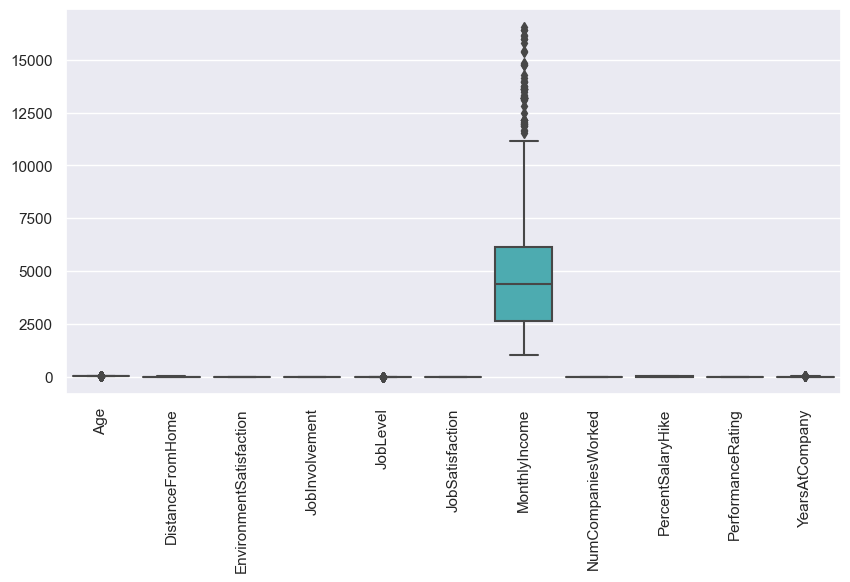

In [8]:
plt.figure(figsize=(10,5))
sns.boxplot(data=attrition)
plt.xticks(rotation=90)
plt.show()


###### By looking the box plot, we can see that there are some outliers in the "Monthly Income" Feature as we expected !!!

###### Since, the outliers are not so far.. instead of removing the outliers, we can perform capping !!


In [9]:
# Let's find the upper range and lower range for the feature "MonthlyIncome"

Q_3 = attrition.MonthlyIncome.quantile(.75)
Q_1 = attrition.MonthlyIncome.quantile(.25)

IQR = Q_3 - Q_1

upper_range = Q_3 + 1.5 * IQR

lower_range = Q_3 - 1.5 * IQR

print("Upper Range:\t",upper_range)
print("\nLower Range:\t",lower_range)


Upper Range:	 11354.5

Lower Range:	 917.5


In [10]:
attrition.MonthlyIncome[attrition.MonthlyIncome>upper_range].count()

# There are 114 samples has range greater than upper range. We can cap them

62

In [11]:
# Cap the outliers with the use of np.where function

# np.where(condition,new_data,Old_data)

attrition.MonthlyIncome = np.where(attrition.MonthlyIncome>upper_range,
                                                          upper_range,attrition.MonthlyIncome)

In [12]:
attrition.MonthlyIncome[attrition.MonthlyIncome>upper_range].count()

# All the outliers are capped now. Let's check the box plot now

0

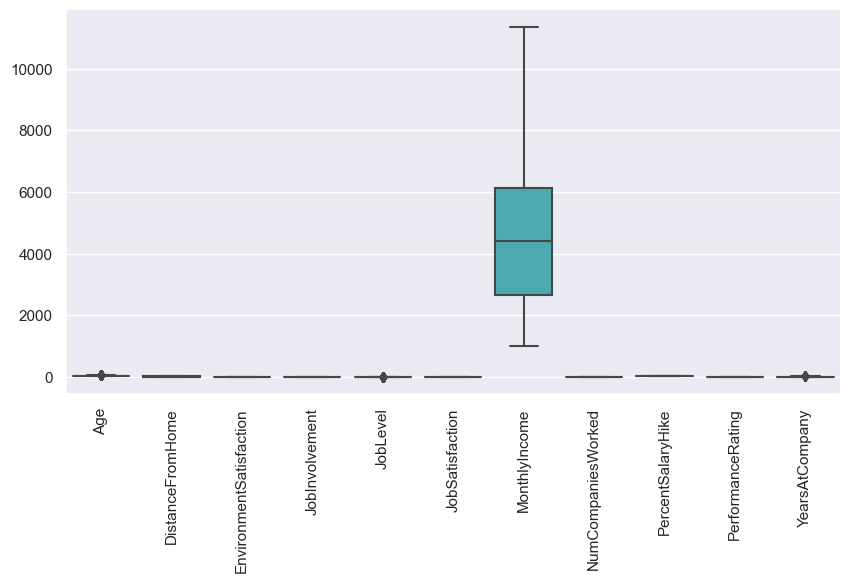

In [13]:
plt.figure(figsize=(10,5))
sns.boxplot(data=attrition)
plt.xticks(rotation=90)
plt.show()


##### Now, there is no outliers

### Categorical (text) to Categorical (numerical) conversion

In [14]:
object_columns = list(attrition.select_dtypes(include="object").columns)

len(object_columns)

# So,There are totally 7 features which has categorical data in the form of text.
# We need to convert into numerical data

7

In [15]:
# Let's convert the text features into the numerical features by the use of LabelEncoder

le = LabelEncoder()
df_categorical = attrition.select_dtypes(include=['object'])
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,OverTime
0,1,1,1,1,1,6,1
1,1,2,2,3,1,7,0
2,1,2,1,1,1,2,0
3,0,2,1,3,0,6,1
4,0,1,1,1,0,4,0


In [16]:
#Remove the original categorical(text) features and add the numerically converted features

attrition_copy = pd.DataFrame(attrition) # For backup/Reference

for m in df_categorical.columns:
    attrition.drop(m,axis=1,inplace=True)

    
attrition=pd.concat([attrition,df_categorical],axis=1)
attrition.head()

,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,YearsAtCompany,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,OverTime
0,33.000000,3.000000,1,3,1,1.0,3348.00000,1,11,3,10,1,1,1,1,1,6,1
1,34.328671,4.000000,4,1,3,4.0,4938.09589,1,11,3,14,1,2,2,3,1,7,0
2,40.000000,9.000000,4,3,1,1.0,2018.00000,3,14,3,5,1,2,1,1,1,2,0
3,42.000000,9.697857,2,4,2,2.0,2372.00000,6,16,3,1,0,2,1,3,0,6,1
4,43.000000,27.000000,3,3,3,1.0,10820.00000,8,11,3,8,0,1,1,1,0,4,0


### Check the correlation matrix and find the strength

In [17]:
cor_df=pd.DataFrame(attrition.corr()["Attrition"])
cor_df["Absolute_Corr"]=abs(cor_df["Attrition"])
cor_df.sort_values(by="Absolute_Corr",ascending=False)

,Attrition,Absolute_Corr
Attrition,1.000000,1.000000
OverTime,0.288629,0.288629
Age,-0.222448,0.222448
YearsAtCompany,-0.218625,0.218625
JobLevel,-0.198967,0.198967
JobInvolvement,-0.177360,0.177360
MonthlyIncome,-0.167963,0.167963
EnvironmentSatisfaction,-0.130128,0.130128
DistanceFromHome,0.116024,0.116024
JobSatisfaction,-0.113420,0.113420


<Axes: >

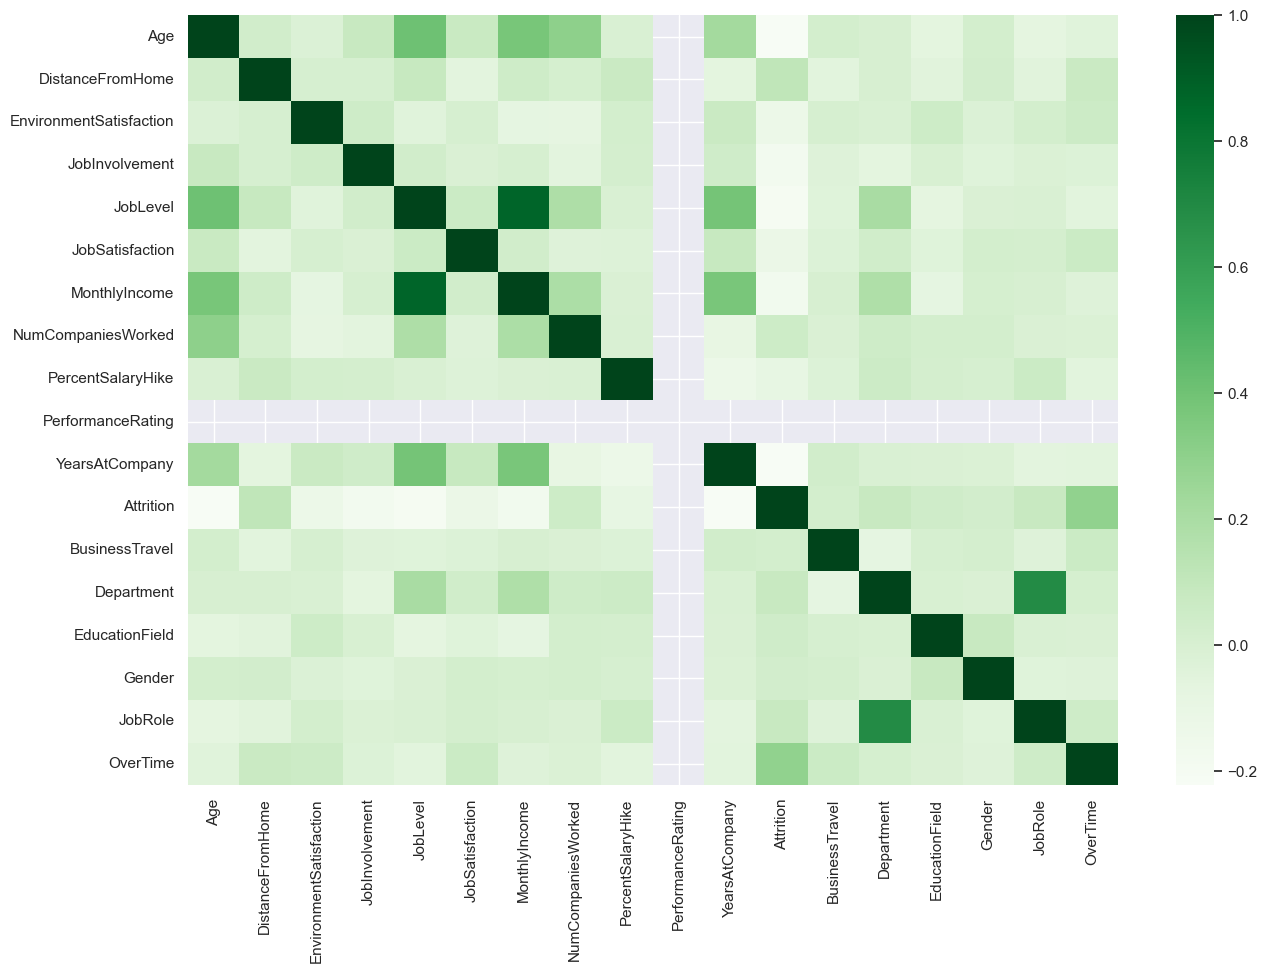

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(attrition.corr(),cmap="Greens")

In [19]:
# Let's convert the datatype of converted numerical columns to category

for k in df_categorical.columns:
    attrition[k]=attrition[k].astype("category")

attrition.select_dtypes(include="category").columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'OverTime'],
      dtype='object')

#### Let's check the Attrition rate with some features

<Axes: xlabel='Attrition', ylabel='count'>

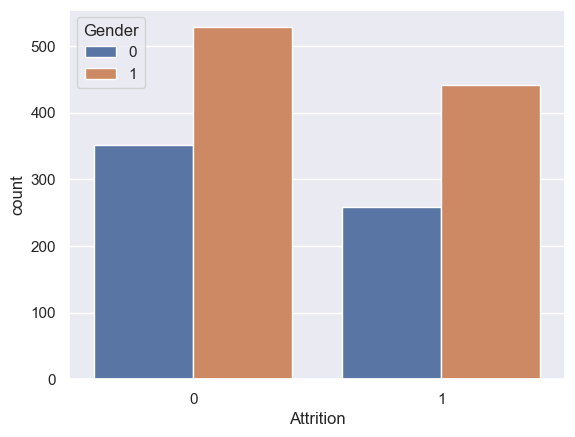

In [20]:
# Attrition vs Gender

sns.countplot(x="Attrition",data=attrition,hue="Gender")

# Gender : 0 - Female ; 1- Male

# Attrition : 0 - No ; 1- Yes

###### By the count plot, we can see the Attrition rate is high for males when compared to females and most of the employees are not changing the company.

<Axes: xlabel='Attrition', ylabel='count'>

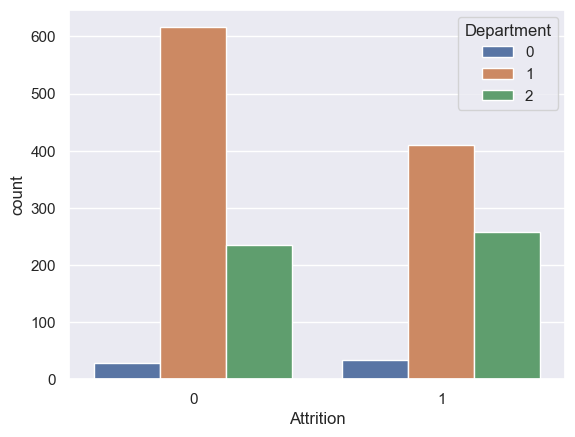

In [21]:
# Attrition vs Department
sns.countplot(x="Attrition",data=attrition,hue="Department")

# 'Department': [('Human Resources', 0),('Research & Development', 1),('Sales', 2)]

# Attrition : 0 - No ; 1- Yes

###### By the above plot, we can infer that  the ratio between Employees in R&D dept not trying to change the company and trying to change the company is Large. So, the probability of Employees from R&D department will try to change the company is very less..

#### Let's separate only the Indpendent features for SUPERVISED LEARNING

In [22]:
attrition.columns

Index(['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'YearsAtCompany', 'Attrition',
       'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'OverTime'],
      dtype='object')

In [23]:
X = attrition.drop(["Attrition"],axis=1)

Y = attrition["Attrition"]

In [24]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=0)  

### Train and test the models

In [72]:
# Logistic Regression model

log_model = LogisticRegression()  
log_model.fit(X_train, y_train)

log_model_f = log_model.predict(X_test) 
y_log_model_met=metrics.roc_auc_score(y_test,log_model_f)

print("ROC_AUC Score for y_log_model_met:\n",y_log_model_met)

ROC_AUC Score for y_log_model_met:
 0.6503917255921328


In [73]:
# Decision Tree model

tree_model = DecisionTreeClassifier()  
tree_model.fit(X_train, y_train)

tree_model_f = tree_model.predict(X_test) 
tree_model_met=metrics.roc_auc_score(y_test,tree_model_f)

print("ROC_AUC Score for tree_model_met:\n",tree_model_met)

ROC_AUC Score for tree_model_met:
 0.8640321378583243


In [74]:
ROC_AUC_Scores_2=pd.DataFrame([y_log_model_met,tree_model_met,
                                     ],columns=["ROC_AUC_Scores"]
                               ,index= ["Log_model_met","Tree_model_met",
                                     ])

ROC_AUC_Scores_2.sort_values(by="ROC_AUC_Scores",ascending=False)

,ROC_AUC_Scores
Tree_model_met,0.864032
Log_model_met,0.650392


##### By looking the above dataframe, we can see that Tree model performs better than other models..

### Grid Search

In [75]:
param_grid_dt = {
    'max_depth': list(range(1,15)),
    'min_samples_split': list(range(1,15)),
    'min_samples_leaf': list(range(1,15)),
    'criterion': ["gini", "entropy", "log_loss"]
}

param_grid_lr = {
    'C': list(range(1,15))
}


In [76]:
grid_search_dt = GridSearchCV(tree_model, param_grid_dt, scoring="roc_auc", cv=5, n_jobs=-1)
grid_search_lr = GridSearchCV(log_model, param_grid_lr, scoring="roc_auc", cv=5, n_jobs=-1)

In [77]:
grid_search_lr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]},
             scoring='roc_auc')

In [78]:
params = grid_search_lr.best_params_

c_val = params["C"]


In [79]:
lr_best = LogisticRegression(C=c_val)
lr_best.fit(X_train, y_train)

log_model_f1 = lr_best.predict(X_test) 
y_log_model_met1=metrics.roc_auc_score(y_test,log_model_f1)

print("ROC_AUC Score for y_log_model_met:\n",y_log_model_met1)

ROC_AUC Score for y_log_model_met:
 0.6534728155163326


In [80]:
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13, 14]},
             scoring='roc_auc')

In [81]:
params = grid_search_dt.best_params_
md = params["max_depth"]
ml = params["min_samples_leaf"]
ms = params["min_samples_split"]
cr = params["criterion"]

In [82]:
params

{'criterion': 'gini',
 'max_depth': 13,
 'min_samples_leaf': 1,
 'min_samples_split': 10}

In [83]:
dt_best = DecisionTreeClassifier(max_depth= md, min_samples_leaf= ml, min_samples_split= ms,criterion=cr)  
dt_best.fit(X_train, y_train)

tree_model_f1 = dt_best.predict(X_test) 
tree_model_met1=metrics.roc_auc_score(y_test,tree_model_f1)

print("Accuracy for tree_model_met:\n",tree_model_met1)

Accuracy for tree_model_met:
 0.8270954138112809


In [85]:
ROC_AUC_Scores_2=pd.DataFrame([y_log_model_met,tree_model_met,y_log_model_met1,tree_model_met1
                                     ],columns=["ROC_AUC_Scores"]
                               ,index= ["Log_model_met","Tree_model_met","best_lr","best_dt"
                                     ])

ROC_AUC_Scores_2.T

,Log_model_met,Tree_model_met,best_lr,best_dt
ROC_AUC_Scores,0.650392,0.864032,0.653473,0.827095


### After Grid search parameters also there is little drop in Tree model and little improvement in log model